# <font color = 'pickle'> Install Libraries/ Set Google Colab

In [1]:
from pathlib import Path
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  from google.colab import drive
  drive.mount('/content/drive')
  !pip install --upgrade fastai timm kaggle -qq
  base_folder = Path('/content/drive/MyDrive/data')
  data_folder = Path('/content')
else:
  base_folder = Path('S:\Fall 2023\Applied Deep Learning')
  data_folder = Path('S:\Fall 2023\Applied Deep Learning')
  print('Not running on CoLab')

Running on CoLab
Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 91.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

# <font color = 'pickle'> Specify Project Folder

In [2]:
kaggle_api = base_folder/'.kaggle'
data_folder = data_folder/'inclass_kaggle_data'
model_folder = base_folder/'models/dl_fall_2023/inclass_kaggle'
archive_folder  = data_folder/'archive'

In [3]:
data_folder.mkdir(exist_ok=True)
kaggle_api.mkdir(exist_ok=True)
model_folder.mkdir(exist_ok=True, parents=True)
archive_folder.mkdir(exist_ok=True)


In [4]:
import os
if 'google.colab' in str(get_ipython()):
    os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/data/.kaggle/"

In [5]:
if 'google.colab' in str(get_ipython()):
    !chmod 600 /content/drive/MyDrive/data/.kaggle/kaggle.json

In [6]:
if 'google.colab' in str(get_ipython()):
    ! ls -la  /content/drive/MyDrive/data/.kaggle/kaggle.json

-rw------- 1 root root 67 Nov 13 23:48 /content/drive/MyDrive/data/.kaggle/kaggle.json


# <font color = 'pickle'> Import Libraries

In [7]:
import fastai; fastai.__version__

'2.7.14'

In [8]:
from fastai.vision.all import *
from kaggle import api
from zipfile import ZipFile
import timm

# <font color = 'pickle'> Get Data from kaggle

In [9]:
! kaggle competitions download inclassplantpathologysmallf23 -p {archive_folder}


 97% 535M/552M [00:05<00:00, 102MB/s]
100% 552M/552M [00:05<00:00, 112MB/s]


In [10]:
file = archive_folder/'inclassplantpathologysmallf23.zip'
with ZipFile(file , 'r') as f:
    filenames = f.namelist()

In [11]:
filenames[0:10]

['sample_submission.csv',
 'test/test/test_image_1.jpg',
 'test/test/test_image_10.jpg',
 'test/test/test_image_100.jpg',
 'test/test/test_image_1000.jpg',
 'test/test/test_image_1001.jpg',
 'test/test/test_image_1002.jpg',
 'test/test/test_image_1003.jpg',
 'test/test/test_image_1004.jpg',
 'test/test/test_image_1005.jpg']

In [12]:
with ZipFile(file ,'r') as f:
 f.extractall(path = data_folder)

# <font color = 'pickle'> Understand Data

In [13]:
train_path = data_folder/'train/train'

In [14]:
files = get_image_files(train_path)

In [15]:
train_path.ls()

(#13042) [Path('/content/inclass_kaggle_data/train/train/train_image_3330.jpg'),Path('/content/inclass_kaggle_data/train/train/train_image_287.jpg'),Path('/content/inclass_kaggle_data/train/train/train_image_5318.jpg'),Path('/content/inclass_kaggle_data/train/train/train_image_4407.jpg'),Path('/content/inclass_kaggle_data/train/train/train_image_3070.jpg'),Path('/content/inclass_kaggle_data/train/train/train_image_7509.jpg'),Path('/content/inclass_kaggle_data/train/train/train_image_1482.jpg'),Path('/content/inclass_kaggle_data/train/train/train_image_6719.jpg'),Path('/content/inclass_kaggle_data/train/train/train_image_8915.jpg'),Path('/content/inclass_kaggle_data/train/train/train_image_11581.jpg')...]

##  <font color = 'pickle'>Look at a sample Image

(600, 400)


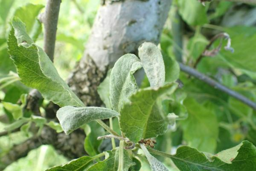

In [16]:
sample_image = PILImage.create(files[0])
print(sample_image.size)
sample_image.to_thumb(256)

##  <font color = 'pickle'> Check size of all the images

In [17]:
from fastcore.parallel import *

In [18]:
def get_sizes(image):
    return PILImage.create(image).size

In [19]:
sizes = parallel(get_sizes, files, progress=True)

In [20]:
pd.Series(sizes).value_counts()

(600, 400)    12409
(600, 450)      627
(600, 600)        3
(450, 600)        2
(600, 337)        1
dtype: int64

# <font color = 'pickle'> Data Loader

In [21]:
df = pd.read_csv(data_folder/'train.csv')

In [22]:
df.head(10)

,image,labels
0,train_image_1.jpg,powdery_mildew
1,train_image_2.jpg,scab
2,train_image_3.jpg,scab frog_eye_leaf_spot
3,train_image_4.jpg,powdery_mildew
4,train_image_5.jpg,complex
5,train_image_6.jpg,rust
6,train_image_7.jpg,scab frog_eye_leaf_spot
7,train_image_8.jpg,scab frog_eye_leaf_spot
8,train_image_9.jpg,frog_eye_leaf_spot
9,train_image_10.jpg,frog_eye_leaf_spot


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13042 entries, 0 to 13041
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   13042 non-null  object
 1   labels  13042 non-null  object
dtypes: object(2)
memory usage: 203.9+ KB


In [24]:
# Extracting unique labels
unique_labels = df['labels'].unique()

# Printing the unique labels
print("Unique Labels:")
for label in unique_labels:
    print(label)

Unique Labels:
powdery_mildew
scab
scab frog_eye_leaf_spot
complex
rust
frog_eye_leaf_spot
healthy
frog_eye_leaf_spot complex
rust frog_eye_leaf_spot
powdery_mildew complex
scab frog_eye_leaf_spot complex
rust complex


In [25]:
# def get_x(df): return str(small_train_images) + '/' + (df['image'])
def get_x(df):
  return data_folder/'train/train'/df['image']
def get_y(df):
  return df['labels'].split(' ')
dblock = DataBlock(get_x= get_x,
                   get_y = get_y,
                   splitter = RandomSplitter(seed = 42))
dsets = dblock.datasets(df)
dsets.train[-1]

(Path('/content/inclass_kaggle_data/train/train/train_image_6712.jpg'),
 ['scab'])

In [26]:
dblock = DataBlock(blocks= (ImageBlock, MultiCategoryBlock),
                   get_x= get_x,
                   get_y = get_y,
                  splitter = RandomSplitter(seed = 42))
dsets = dblock.datasets(df)
dsets.train[15]

(PILImage mode=RGB size=600x400, TensorMultiCategory([1., 0., 0., 0., 1., 0.]))

In [27]:
dsets.train.vocab

['complex', 'frog_eye_leaf_spot', 'healthy', 'powdery_mildew', 'rust', 'scab']

In [28]:
idxs = torch.where(dsets.train[15][1] == 1.)[0]

In [29]:
dsets.train.vocab[idxs]

(#2) ['complex','rust']

In [30]:
dblock = DataBlock(blocks= (ImageBlock, MultiCategoryBlock),
                  get_x= get_x,
                  get_y = get_y,
                  splitter = RandomSplitter(seed = 42),
                  item_tfms= Resize(400, method = 'squish'),
                  batch_tfms= aug_transforms(size = 128, min_scale = 0.75))
dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=600x400, TensorMultiCategory([0., 0., 0., 0., 0., 1.]))

In [31]:
import os
os.cpu_count()

8

In [32]:
dls = dblock.dataloaders(df, bs = 64, num_workers =8)

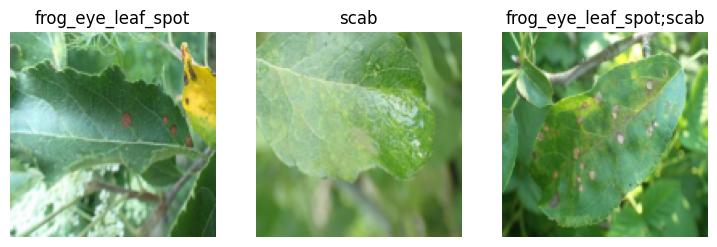

In [33]:
dls.train.show_batch(max_n=3)

In [34]:
dls.device

device(type='cuda', index=0)

# <font color = 'pickle'> Model 1 resnet family

In [35]:
f1score = F1ScoreMulti(thresh = 0.5)
loss_func = nn.BCEWithLogitsLoss()
learn = vision_learner(dls,'resnet26d', metrics = [F1ScoreMulti(thresh = 0.5)], path = model_folder).to_fp16()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/64.2M [00:00<?, ?B/s]

SuggestedLRs(minimum=0.017378008365631102, steep=0.02290867641568184, valley=0.0014454397605732083, slide=0.013182567432522774)

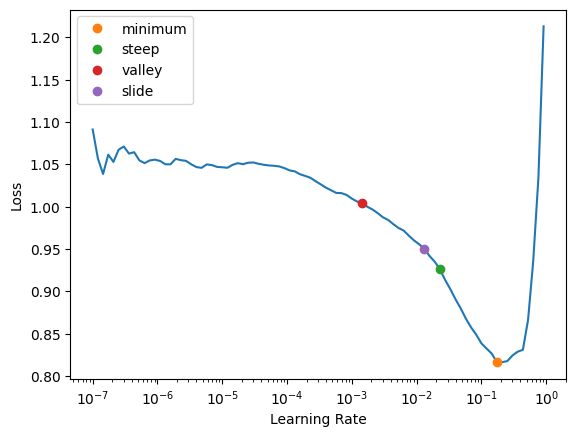

In [36]:
learn.lr_find(suggest_funcs = (minimum, steep, valley, slide))

In [37]:
learn.fine_tune(3, 0.02)

epoch,train_loss,valid_loss,f1_score,time
0,0.382306,0.307176,0.593372,00:22


epoch,train_loss,valid_loss,f1_score,time
0,0.226199,0.191324,0.761642,00:23
1,0.154342,0.138854,0.828517,00:23
2,0.122188,0.126955,0.839388,00:23


# <font color ='pickle'> Find the threshold

In [38]:
F1ScoreMulti??

In [39]:
learn.metrics = F1ScoreMulti(thresh = 0.1)

In [40]:
learn.metrics

(#1) [<fastai.metrics.AccumMetric object at 0x780d41204250>]

In [41]:
learn.validate()

(#2) [0.12695501744747162,0.7997784361417852]

In [42]:
learn.metrics = F1ScoreMulti(thresh = 0.9)

In [43]:
learn.validate()

(#2) [0.12695501744747162,0.6912915907218234]

In [44]:
preds, targs = learn.get_preds()

In [45]:
preds.shape, targs.shape

(torch.Size([2608, 6]), torch.Size([2608, 6]))

In [46]:
f1score = F1ScoreMulti(thresh = None, sigmoid=False)

In [47]:
idxs = (preds>0.5) * 1

In [48]:
f1score(idxs, targs)

0.8393880019298616

In [49]:
xs = torch.linspace(0.05, 0.95, 29)

In [50]:
f1scores = [f1score((preds>i) * 1, targs) for i in xs]

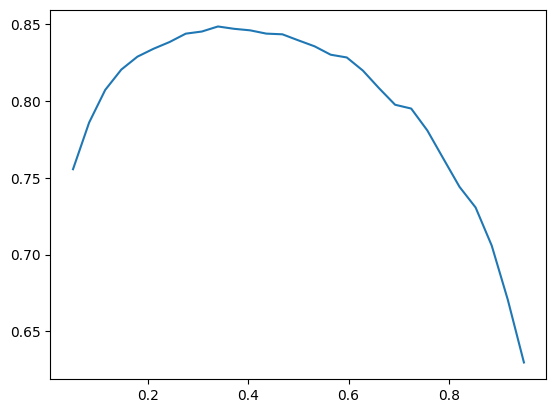

In [51]:
plt.plot(xs, f1scores)

In [52]:
torch.argmax(torch.tensor(f1scores))

tensor(9)

In [53]:
xs[9]

tensor(0.3393)

In [54]:
f1scores[9]

0.8484448103646399

# <font color ='pickle'>Test Predictions

In [55]:
test_files = get_image_files(data_folder/'test/test').sorted()

In [56]:
test_files

(#5590) [Path('/content/inclass_kaggle_data/test/test/test_image_1.jpg'),Path('/content/inclass_kaggle_data/test/test/test_image_10.jpg'),Path('/content/inclass_kaggle_data/test/test/test_image_100.jpg'),Path('/content/inclass_kaggle_data/test/test/test_image_1000.jpg'),Path('/content/inclass_kaggle_data/test/test/test_image_1001.jpg'),Path('/content/inclass_kaggle_data/test/test/test_image_1002.jpg'),Path('/content/inclass_kaggle_data/test/test/test_image_1003.jpg'),Path('/content/inclass_kaggle_data/test/test/test_image_1004.jpg'),Path('/content/inclass_kaggle_data/test/test/test_image_1005.jpg'),Path('/content/inclass_kaggle_data/test/test/test_image_1006.jpg')...]

In [57]:
test_dl = learn.dls.test_dl(test_files)

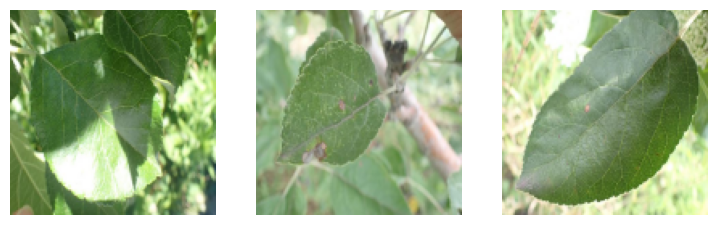

In [58]:
test_dl.show_batch(max_n=3)

In [59]:
preds, _ = learn.tta(dl = test_dl)

In [60]:
preds

tensor([[1.3846e-02, 1.2626e-02, 8.9763e-01, 1.0698e-02, 1.0712e-03, 5.8037e-02],
        [5.8507e-01, 4.8018e-01, 1.2962e-03, 1.3300e-02, 2.4562e-03, 2.8097e-01],
        [1.8469e-01, 4.5260e-01, 1.9728e-03, 6.8958e-01, 3.5080e-03, 6.0906e-02],
        ...,
        [4.6289e-04, 4.8596e-04, 9.9191e-01, 1.6994e-03, 1.5299e-04, 6.5410e-04],
        [2.5403e-01, 8.8840e-01, 3.0252e-04, 7.1184e-04, 8.8426e-04, 1.9944e-01],
        [1.8026e-02, 1.4416e-02, 4.0731e-02, 7.9831e-01, 2.3463e-02, 1.3851e-02]])

In [61]:
pred_decoded = [torch.where(pred>0.34)[0] for pred in preds]

In [62]:
pred_decoded[0:20]

[tensor([2]),
 tensor([0, 1]),
 tensor([1, 3]),
 tensor([2, 5]),
 tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([0]),
 tensor([0, 5]),
 tensor([5]),
 tensor([2]),
 tensor([5]),
 tensor([2]),
 tensor([1]),
 tensor([5]),
 tensor([5]),
 tensor([0, 1, 4]),
 tensor([2]),
 tensor([2]),
 tensor([5])]

In [63]:
vocab = learn.dls.vocab

In [64]:
pred_labels = [vocab[pred] for pred in pred_decoded[0:20]]

In [65]:
pred_labels

[(#1) ['healthy'],
 (#2) ['complex','frog_eye_leaf_spot'],
 (#2) ['frog_eye_leaf_spot','powdery_mildew'],
 (#2) ['healthy','scab'],
 (#1) ['frog_eye_leaf_spot'],
 (#1) ['frog_eye_leaf_spot'],
 (#1) ['frog_eye_leaf_spot'],
 (#1) ['complex'],
 (#2) ['complex','scab'],
 (#1) ['scab'],
 (#1) ['healthy'],
 (#1) ['scab'],
 (#1) ['healthy'],
 (#1) ['frog_eye_leaf_spot'],
 (#1) ['scab'],
 (#1) ['scab'],
 (#3) ['complex','frog_eye_leaf_spot','rust'],
 (#1) ['healthy'],
 (#1) ['healthy'],
 (#1) ['scab']]

In [66]:
[" ".join(pred)for pred in pred_labels]

['healthy',
 'complex frog_eye_leaf_spot',
 'frog_eye_leaf_spot powdery_mildew',
 'healthy scab',
 'frog_eye_leaf_spot',
 'frog_eye_leaf_spot',
 'frog_eye_leaf_spot',
 'complex',
 'complex scab',
 'scab',
 'healthy',
 'scab',
 'healthy',
 'frog_eye_leaf_spot',
 'scab',
 'scab',
 'complex frog_eye_leaf_spot rust',
 'healthy',
 'healthy',
 'scab']

In [67]:
pred_labels = [' '.join(vocab[torch.where(pred>0.34)[0]]) for pred in preds]

In [68]:
pred_labels[0:20]

['healthy',
 'complex frog_eye_leaf_spot',
 'frog_eye_leaf_spot powdery_mildew',
 'healthy scab',
 'frog_eye_leaf_spot',
 'frog_eye_leaf_spot',
 'frog_eye_leaf_spot',
 'complex',
 'complex scab',
 'scab',
 'healthy',
 'scab',
 'healthy',
 'frog_eye_leaf_spot',
 'scab',
 'scab',
 'complex frog_eye_leaf_spot rust',
 'healthy',
 'healthy',
 'scab']

# <font color ='pickle'> Kaggle Submission

In [ ]:
sample_submission= pd.read_csv(data_folder/'sample_submission.csv')

In [ ]:
sample_submission

,image,labels
0,test_image_1.jpg,healthy
1,test_image_2.jpg,healthy
2,test_image_3.jpg,healthy
3,test_image_4.jpg,healthy
4,test_image_5.jpg,healthy
...,...,...
5585,test_image_5586.jpg,healthy
5586,test_image_5587.jpg,healthy
5587,test_image_5588.jpg,healthy
5588,test_image_5589.jpg,healthy


In [ ]:
sample_submission = sample_submission.sort_values(by = 'image')


In [ ]:
sample_submission

,image,labels
0,test_image_1.jpg,healthy
9,test_image_10.jpg,healthy
99,test_image_100.jpg,healthy
999,test_image_1000.jpg,healthy
1000,test_image_1001.jpg,healthy
...,...,...
994,test_image_995.jpg,healthy
995,test_image_996.jpg,healthy
996,test_image_997.jpg,healthy
997,test_image_998.jpg,healthy


In [ ]:
sample_submission['labels'] = pred_labels

In [ ]:
sample_submission

,image,labels
0,test_image_1.jpg,healthy scab
9,test_image_10.jpg,complex frog_eye_leaf_spot
99,test_image_100.jpg,frog_eye_leaf_spot
999,test_image_1000.jpg,scab
1000,test_image_1001.jpg,frog_eye_leaf_spot
...,...,...
994,test_image_995.jpg,powdery_mildew
995,test_image_996.jpg,healthy
996,test_image_997.jpg,healthy
997,test_image_998.jpg,frog_eye_leaf_spot


In [ ]:
sample_submission.to_csv(model_folder/'third_sub.csv', index = False)

In [ ]:
!head {model_folder/'third_sub.csv'}

image,labels
test_image_1.jpg,healthy scab
test_image_10.jpg,complex frog_eye_leaf_spot
test_image_100.jpg,frog_eye_leaf_spot
test_image_1000.jpg,scab
test_image_1001.jpg,frog_eye_leaf_spot
test_image_1002.jpg,frog_eye_leaf_spot
test_image_1003.jpg,complex frog_eye_leaf_spot
test_image_1004.jpg,complex
test_image_1005.jpg,complex scab


In [ ]:
comp = 'inclassplantpathologysmallf23'
api.competition_submit(model_folder/'third_sub.csv', 'inclass nov14', comp)

100%|██████████| 169k/169k [00:00<00:00, 195kB/s]


Successfully submitted to Inclass_Plant_Pathology_Small_F23

# Part-2 Small Models

##resizing the images

In [92]:
data_folder

Path('/content/inclass_kaggle_data')

In [93]:
small_img_folder = data_folder/'datasets/small_images'

In [94]:
small_img_folder.mkdir(exist_ok=True, parents=True)

In [95]:
resize_images(data_folder, dest = small_img_folder, max_size = 256, recurse = True)

In [96]:
small_img_folder.ls()

(#3) [Path('/content/inclass_kaggle_data/datasets/small_images/train'),Path('/content/inclass_kaggle_data/datasets/small_images/test'),Path('/content/inclass_kaggle_data/datasets/small_images/datasets')]

## Create Data loader

In [97]:
small_train_path = small_img_folder/'train/train'

In [98]:
small_test_path = small_img_folder/'test/test'

In [99]:
small_train_path.ls()

(#13042) [Path('/content/inclass_kaggle_data/datasets/small_images/train/train/train_image_3330.jpg'),Path('/content/inclass_kaggle_data/datasets/small_images/train/train/train_image_287.jpg'),Path('/content/inclass_kaggle_data/datasets/small_images/train/train/train_image_5318.jpg'),Path('/content/inclass_kaggle_data/datasets/small_images/train/train/train_image_4407.jpg'),Path('/content/inclass_kaggle_data/datasets/small_images/train/train/train_image_3070.jpg'),Path('/content/inclass_kaggle_data/datasets/small_images/train/train/train_image_7509.jpg'),Path('/content/inclass_kaggle_data/datasets/small_images/train/train/train_image_1482.jpg'),Path('/content/inclass_kaggle_data/datasets/small_images/train/train/train_image_6719.jpg'),Path('/content/inclass_kaggle_data/datasets/small_images/train/train/train_image_8915.jpg'),Path('/content/inclass_kaggle_data/datasets/small_images/train/train/train_image_11581.jpg')...]

In [100]:
small_test_path.ls()

(#5590) [Path('/content/inclass_kaggle_data/datasets/small_images/test/test/test_image_3703.jpg'),Path('/content/inclass_kaggle_data/datasets/small_images/test/test/test_image_2028.jpg'),Path('/content/inclass_kaggle_data/datasets/small_images/test/test/test_image_1012.jpg'),Path('/content/inclass_kaggle_data/datasets/small_images/test/test/test_image_4170.jpg'),Path('/content/inclass_kaggle_data/datasets/small_images/test/test/test_image_2646.jpg'),Path('/content/inclass_kaggle_data/datasets/small_images/test/test/test_image_5441.jpg'),Path('/content/inclass_kaggle_data/datasets/small_images/test/test/test_image_140.jpg'),Path('/content/inclass_kaggle_data/datasets/small_images/test/test/test_image_5223.jpg'),Path('/content/inclass_kaggle_data/datasets/small_images/test/test/test_image_2812.jpg'),Path('/content/inclass_kaggle_data/datasets/small_images/test/test/test_image_3743.jpg')...]

(256, 170)


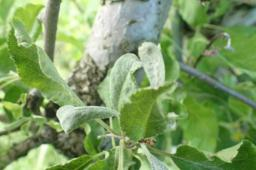

In [101]:
files = get_image_files(small_train_path)


sample_image2 = PILImage.create(files[0])
print(sample_image2.size)
sample_image2.to_thumb(256)


In [102]:
sizes = parallel(get_sizes, files, progress=True)


pd.Series(sizes).value_counts()


(256, 170)    12409
(256, 192)      627
(256, 256)        3
(192, 256)        2
(256, 143)        1
dtype: int64

In [103]:
df2 = pd.read_csv(data_folder/'train.csv')

In [104]:
# def get_x(df): return str(small_train_images) + '/' + (df['image'])
def get_x(df2):
  return small_train_path/df2['image']
def get_y(df2):
  return df2['labels'].split(' ')
dblock = DataBlock(get_x= get_x,
                   get_y = get_y,
                   splitter = RandomSplitter(seed = 42))
dsets = dblock.datasets(df2)
dsets.train[-1]

(Path('/content/inclass_kaggle_data/datasets/small_images/train/train/train_image_6712.jpg'),
 ['scab'])

In [105]:
dblock = DataBlock(blocks= (ImageBlock, MultiCategoryBlock),
                   get_x= get_x,
                   get_y = get_y,
                   splitter = RandomSplitter(seed = 42, valid_pct = 0.2),
                   item_tfms = Resize(size = (256, 192)),)
dsets = dblock.datasets(df2)
dsets.train[15]

(PILImage mode=RGB size=256x170, TensorMultiCategory([1., 0., 0., 0., 1., 0.]))

In [106]:
dls = dblock.dataloaders(df2, bs = 64, num_workers =8)


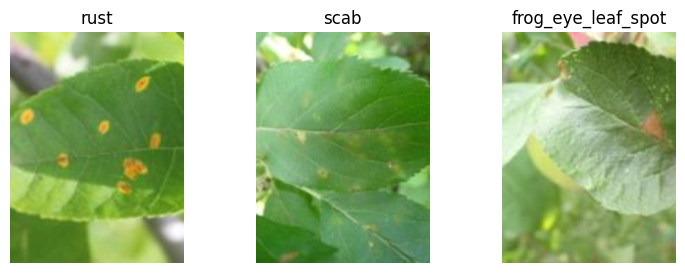

In [107]:
dls.show_batch(max_n=3)

In [108]:
small_train_path

Path('/content/inclass_kaggle_data/datasets/small_images/train/train')

## Experiment1 - Resnet26d

In [109]:
train_files2 = get_image_files(small_train_path)
test_files2 = get_image_files(small_test_path)

In [110]:
train_labels = [parent_label(file) for file in train_files2]

In [111]:
dsets.train.vocab

['complex', 'frog_eye_leaf_spot', 'healthy', 'powdery_mildew', 'rust', 'scab']

In [112]:
idxs = torch.where(dsets.train[15][1] == 1.)[0]

In [113]:
dsets.train.vocab[idxs]

(#2) ['complex','rust']

In [114]:
f1score = F1ScoreMulti(thresh = 0.34)
loss_func = nn.BCEWithLogitsLoss()
learn = vision_learner(dls,'resnet26d', metrics = [F1ScoreMulti(thresh = 0.34)], path = model_folder).to_fp16()

SuggestedLRs(minimum=0.03019951581954956, steep=0.033113110810518265, valley=0.0012022644514217973, slide=0.015848932787775993)

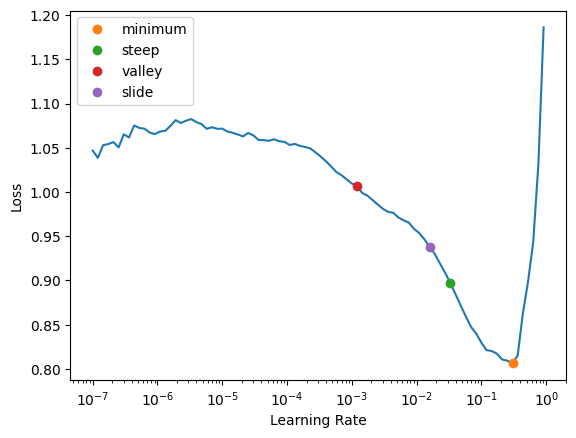

In [115]:
learn.lr_find(suggest_funcs = (minimum, steep, valley, slide))

In [116]:
learn.fine_tune(5, 0.02)

epoch,train_loss,valid_loss,f1_score,time
0,0.359368,0.249318,0.702254,00:14


epoch,train_loss,valid_loss,f1_score,time
0,0.224278,0.170692,0.800186,00:17
1,0.183190,0.154662,0.816920,00:17
2,0.143565,0.132978,0.849443,00:17
3,0.111560,0.120992,0.861066,00:17
4,0.089891,0.122925,0.864168,00:17


In [117]:
parent_label

<function fastai.data.transforms.parent_label(o)>

In [118]:
def train(arch, item, batch, epochs=5, train_path = small_img_folder/'train/train'):
    dblock = DataBlock(blocks = [ImageBlock, CategoryBlock],
                   get_items = get_image_files(train_path),
                   get_y = parent_label,
                   splitter = RandomSplitter(seed = 42, valid_pct = 0.2),
                   item_tfms = item,
                   batch_tfms = batch
                   )
    dls = dblock.dataloaders(train_path, bs = 64)
    learn = vision_learner(dls, arch, metrics=error_rate).to_fp16()
    learn.fine_tune(epochs, 0.02)
    return learn

In [119]:
# Print shapes of input and target
print("Input shape:", learn.dls.one_batch()[0].shape)
print("Target shape:", learn.dls.one_batch()[1].shape)

Input shape: torch.Size([64, 3, 256, 192])
Target shape: torch.Size([64, 6])


SuggestedLRs(minimum=1.2022644114040304e-06, steep=1.0964781722577754e-06, valley=1.4454397387453355e-05, slide=0.0002290867705596611)

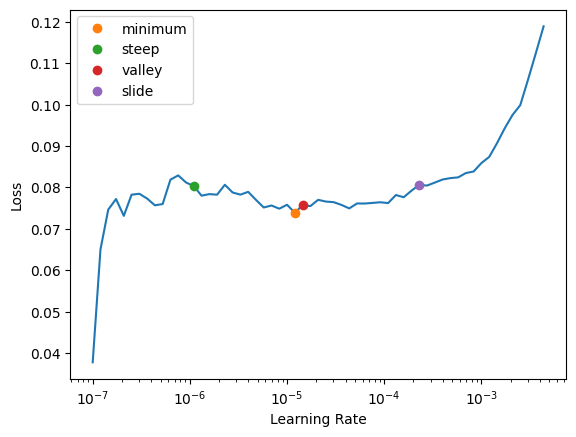

In [122]:
learn.lr_find(suggest_funcs = (minimum, steep, valley, slide))

In [123]:
learn.fine_tune(5, 1.2022644114040304e-06)

epoch,train_loss,valid_loss,f1_score,time
0,0.087523,0.122876,0.861819,00:16


epoch,train_loss,valid_loss,f1_score,time
0,0.083452,0.120983,0.863411,00:17
1,0.084172,0.122869,0.863637,00:17
2,0.080449,0.123476,0.861168,00:17
3,0.083040,0.124093,0.862761,00:17
4,0.084232,0.121654,0.864365,00:17


#Experiment 2 - ConvNextModel

In [124]:
f1score = F1ScoreMulti(thresh = 0.34)
loss_func = nn.BCEWithLogitsLoss()
learn = vision_learner(dls,'convnext_small_in22k', metrics = [F1ScoreMulti(thresh = 0.34)], path = model_folder).to_fp16()

/usr/local/lib/python3.10/dist-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name convnext_small_in22k to current convnext_small.fb_in22k.
  model = create_fn(


model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

SuggestedLRs(minimum=0.02089296132326126, steep=0.033113110810518265, valley=0.0012022644514217973, slide=0.010964781977236271)

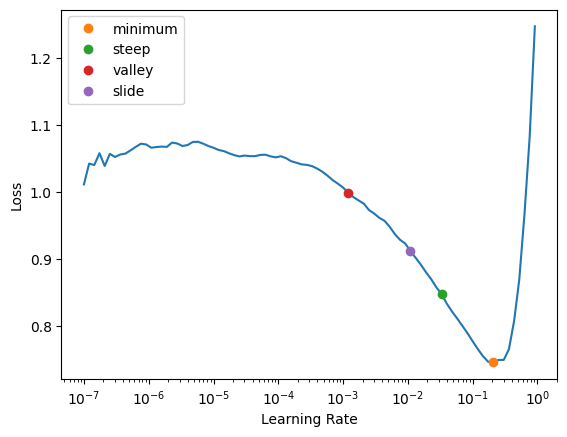

In [125]:
learn.lr_find(suggest_funcs = (minimum, steep, valley, slide))

In [126]:
learn.fine_tune(5, 0.02)

epoch,train_loss,valid_loss,f1_score,time
0,0.275249,0.172564,0.809702,00:26


epoch,train_loss,valid_loss,f1_score,time
0,0.165048,0.120734,0.866010,00:37
1,0.141330,0.135004,0.855830,00:37
2,0.112230,0.107039,0.873839,00:37
3,0.085878,0.093372,0.897800,00:37
4,0.069608,0.090072,0.901625,00:37


##Preprocessing experiments

##Cropping

In [127]:
dblock = DataBlock(blocks= (ImageBlock, MultiCategoryBlock),
                   get_x= get_x,
                   get_y = get_y,
                   splitter = RandomSplitter(seed = 42, valid_pct = 0.2),
                   item_tfms = Resize(192, method='crop'),
                   batch_tfms = aug_transforms(size=128, min_scale=0.75),
                   )
dsets = dblock.datasets(df2)
dsets.train[15]

(PILImage mode=RGB size=256x170, TensorMultiCategory([1., 0., 0., 0., 1., 0.]))

In [128]:
dls = dblock.dataloaders(df2, bs = 64, num_workers =8)

In [129]:
f1score = F1ScoreMulti(thresh = 0.34)
loss_func = nn.BCEWithLogitsLoss()
learn = vision_learner(dls,'convnext_small_in22k', metrics = [F1ScoreMulti(thresh = 0.34)], path = model_folder).to_fp16()

/usr/local/lib/python3.10/dist-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name convnext_small_in22k to current convnext_small.fb_in22k.
  model = create_fn(


SuggestedLRs(minimum=0.02089296132326126, steep=0.03981071710586548, valley=0.0014454397605732083, slide=0.013182567432522774)

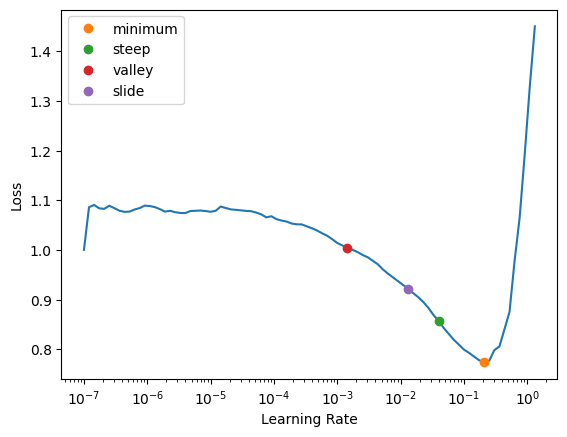

In [130]:
learn.lr_find(suggest_funcs = (minimum, steep, valley, slide))

In [131]:
learn.fine_tune(5, 0.02)

epoch,train_loss,valid_loss,f1_score,time
0,0.279267,0.177936,0.787625,00:18


epoch,train_loss,valid_loss,f1_score,time
0,0.163487,0.149742,0.831630,00:26
1,0.135474,0.128228,0.850549,00:26
2,0.116020,0.109687,0.875283,00:26
3,0.090421,0.096882,0.888567,00:26
4,0.083605,0.096958,0.887312,00:26


##F1- score is not improving significantly through cropping

##Padding

In [132]:
dblock = DataBlock(blocks= (ImageBlock, MultiCategoryBlock),
                   get_x= get_x,
                   get_y = get_y,
                   splitter = RandomSplitter(seed = 42, valid_pct = 0.2),
                   item_tfms = Resize((256,192), method=ResizeMethod.Pad, pad_mode=PadMode.Zeros),
                   batch_tfms = aug_transforms(size = 128, min_scale = 0.75),
                   )
dsets = dblock.datasets(df2)
dsets.train[15]

(PILImage mode=RGB size=256x170, TensorMultiCategory([1., 0., 0., 0., 1., 0.]))

In [133]:
f1score = F1ScoreMulti(thresh = 0.34)
loss_func = nn.BCEWithLogitsLoss()
learn = vision_learner(dls,'convnext_small_in22k', metrics = [F1ScoreMulti(thresh = 0.34)], path = model_folder).to_fp16()

/usr/local/lib/python3.10/dist-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name convnext_small_in22k to current convnext_small.fb_in22k.
  model = create_fn(


SuggestedLRs(minimum=0.017378008365631102, steep=0.033113110810518265, valley=0.0012022644514217973, slide=0.013182567432522774)

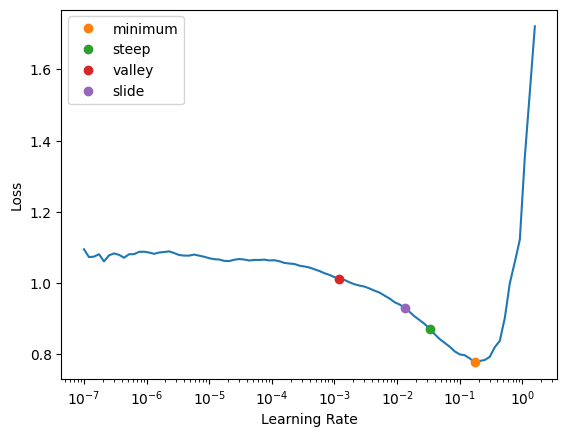

In [134]:
learn.lr_find(suggest_funcs = (minimum, steep, valley, slide))

In [135]:
learn.fine_tune(5, 0.017)

epoch,train_loss,valid_loss,f1_score,time
0,0.286812,0.174832,0.800479,00:19


epoch,train_loss,valid_loss,f1_score,time
0,0.163370,0.136753,0.842322,00:26
1,0.143597,0.121659,0.865232,00:26
2,0.116230,0.108392,0.875029,00:26
3,0.092373,0.094242,0.892184,00:26
4,0.083096,0.093992,0.893866,00:26


## Test time augmentation

### Check error rate before tta

In [136]:
valid = learn.dls.valid
preds,targs = learn.get_preds(dl=valid)

In [137]:
# Check if targs are in one-hot encoded format and convert if necessary
if targs.ndim == 2:
    targs = targs.argmax(dim=1)
error_rate(preds, targs)

TensorBase(0.0932)

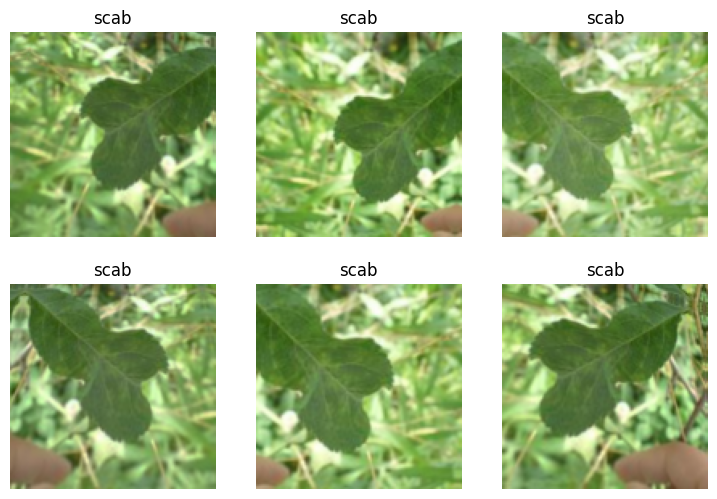

In [138]:
learn.dls.train.show_batch(max_n=6, unique=True)

In [139]:
tta_preds,_ = learn.tta(dl=valid)

In [140]:
error_rate(tta_preds, targs)

TensorBase(0.0901)

# <font color ='pickle'> Kaggle Submission

In [ ]:
sample_submission= pd.read_csv(data_folder/'sample_submission.csv')

In [ ]:
sample_submission

,image,labels
0,test_image_1.jpg,healthy
1,test_image_2.jpg,healthy
2,test_image_3.jpg,healthy
3,test_image_4.jpg,healthy
4,test_image_5.jpg,healthy
...,...,...
5585,test_image_5586.jpg,healthy
5586,test_image_5587.jpg,healthy
5587,test_image_5588.jpg,healthy
5588,test_image_5589.jpg,healthy


In [ ]:
sample_submission = sample_submission.sort_values(by = 'image')


In [ ]:
sample_submission

,image,labels
0,test_image_1.jpg,healthy
9,test_image_10.jpg,healthy
99,test_image_100.jpg,healthy
999,test_image_1000.jpg,healthy
1000,test_image_1001.jpg,healthy
...,...,...
994,test_image_995.jpg,healthy
995,test_image_996.jpg,healthy
996,test_image_997.jpg,healthy
997,test_image_998.jpg,healthy


In [ ]:
sample_submission['labels'] = pred_labels

In [ ]:
sample_submission

,image,labels
0,test_image_1.jpg,healthy scab
9,test_image_10.jpg,complex frog_eye_leaf_spot
99,test_image_100.jpg,frog_eye_leaf_spot
999,test_image_1000.jpg,scab
1000,test_image_1001.jpg,frog_eye_leaf_spot
...,...,...
994,test_image_995.jpg,powdery_mildew
995,test_image_996.jpg,healthy
996,test_image_997.jpg,healthy
997,test_image_998.jpg,frog_eye_leaf_spot


In [ ]:
sample_submission.to_csv(model_folder/'second_sub.csv', index = False)

In [ ]:
!head {model_folder/'second_sub.csv'}

image,labels
test_image_1.jpg,healthy scab
test_image_10.jpg,complex frog_eye_leaf_spot
test_image_100.jpg,frog_eye_leaf_spot
test_image_1000.jpg,scab
test_image_1001.jpg,frog_eye_leaf_spot
test_image_1002.jpg,frog_eye_leaf_spot
test_image_1003.jpg,complex frog_eye_leaf_spot
test_image_1004.jpg,complex
test_image_1005.jpg,complex scab


In [ ]:
comp = 'inclassplantpathologysmallf23'
api.competition_submit(model_folder/'second_sub.csv', 'inclass nov14', comp)

100%|██████████| 169k/169k [00:00<00:00, 190kB/s]


Successfully submitted to Inclass_Plant_Pathology_Small_F23

# Part 3: Ensembling

## Memory and gradient accumulation

In [141]:
tst_files = get_image_files(small_test_path).sorted()
def train(arch, size, item=Resize(480, method='squish'), accum=1, finetune=True, epochs=12, train_path = small_train_path):
    dblock = DataBlock(blocks = [ImageBlock, CategoryBlock],
                   get_items = get_image_files,
                   get_y = parent_label,
                   splitter = RandomSplitter(seed = 42, valid_pct = 0.2),
                   item_tfms = item,
                   batch_tfms = aug_transforms(size=size, min_scale=0.75))

    dls = dblock.dataloaders(train_path, bs = 64//accum)
    cbs = GradientAccumulation(64) if accum else []
    learn = vision_learner(dls, arch, metrics=error_rate, cbs=cbs).to_fp16()
    if finetune:
        learn.fine_tune(epochs, 0.01)
        return learn.tta(dl=dls.test_dl(tst_files))
    else:
        learn.unfreeze()
        learn.fit_one_cycle(epochs, 0.01)

In [142]:
train_path = small_img_folder/'train/train'

In [143]:
train('convnext_small_in22k', 128, epochs=1, accum=1, finetune=False, train_path = train_path)

/usr/local/lib/python3.10/dist-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name convnext_small_in22k to current convnext_small.fb_in22k.
  model = create_fn(


epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,00:34


## Function to check memory

In [144]:
import gc
def report_gpu():
    print(torch.cuda.list_gpu_processes())
    gc.collect()
    torch.cuda.empty_cache()

In [145]:
def free_memory():
    """
    Attempts to free up memory by deleting variables and running Python's garbage collector.
    """
    gc.collect()
    for device_id in range(torch.cuda.device_count()):
        torch.cuda.set_device(device_id)
        torch.cuda.empty_cache()
    gc.collect()

In [147]:
!pip install pynvml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.3 MB/s eta 0:00:00


In [148]:
report_gpu()

GPU:0
process       2122 uses     2658.000 MB GPU memory


In [149]:
free_memory()
train('convnext_small_in22k', 64, epochs=1, accum=2, finetune=False, train_path = train_path)

epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,00:47


In [150]:
report_gpu()

GPU:0
process       2122 uses     2806.000 MB GPU memory


In [151]:
free_memory()
train('convnext_small_in22k', 64, epochs=1, accum=4, finetune=False, train_path = train_path)

epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,01:14


In [152]:
report_gpu()

GPU:0
process       2122 uses     2738.000 MB GPU memory


## Check memory for models to be used in training

In [153]:
import timm

# List all models in timm
all_models = timm.list_models()

# Filter for only Swin Transformer models
swin_models = [model for model in all_models if 'swin' in model.lower()]

swin_models


['swin_base_patch4_window7_224',
 'swin_base_patch4_window12_384',
 'swin_large_patch4_window7_224',
 'swin_large_patch4_window12_384',
 'swin_s3_base_224',
 'swin_s3_small_224',
 'swin_s3_tiny_224',
 'swin_small_patch4_window7_224',
 'swin_tiny_patch4_window7_224',
 'swinv2_base_window8_256',
 'swinv2_base_window12_192',
 'swinv2_base_window12to16_192to256',
 'swinv2_base_window12to24_192to384',
 'swinv2_base_window16_256',
 'swinv2_cr_base_224',
 'swinv2_cr_base_384',
 'swinv2_cr_base_ns_224',
 'swinv2_cr_giant_224',
 'swinv2_cr_giant_384',
 'swinv2_cr_huge_224',
 'swinv2_cr_huge_384',
 'swinv2_cr_large_224',
 'swinv2_cr_large_384',
 'swinv2_cr_small_224',
 'swinv2_cr_small_384',
 'swinv2_cr_small_ns_224',
 'swinv2_cr_small_ns_256',
 'swinv2_cr_tiny_224',
 'swinv2_cr_tiny_384',
 'swinv2_cr_tiny_ns_224',
 'swinv2_large_window12_192',
 'swinv2_large_window12to16_192to256',
 'swinv2_large_window12to24_192to384',
 'swinv2_small_window8_256',
 'swinv2_small_window16_256',
 'swinv2_tiny_wi

In [154]:
free_memory()
train('convnext_large_in22k', 64, epochs=1, accum=2, finetune=False, train_path = train_path)
report_gpu()

/usr/local/lib/python3.10/dist-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name convnext_large_in22k to current convnext_large.fb_in22k.
  model = create_fn(


model.safetensors:   0%|          | 0.00/919M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,00:46


GPU:0
process       2122 uses     5372.000 MB GPU memory


In [155]:
free_memory()
train('vit_large_patch16_224', 224, epochs=1, accum=2, finetune=False, train_path = train_path)
report_gpu()

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,01:42


GPU:0
process       2122 uses    12828.000 MB GPU memory


In [158]:
free_memory()
train('swinv2_large_window12_192_22k', 192, epochs=1, accum=2, finetune=False, train_path = train_path)
report_gpu()

/usr/local/lib/python3.10/dist-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name swinv2_large_window12_192_22k to current swinv2_large_window12_192.ms_in22k.
  model = create_fn(


epoch,train_loss,valid_loss,error_rate,time


OutOfMemoryError: CUDA out of memory. Tried to allocate 14.00 MiB. GPU 0 has a total capacity of 15.77 GiB of which 12.38 MiB is free. Process 2122 has 15.76 GiB memory in use. Of the allocated memory 14.96 GiB is allocated by PyTorch, and 375.82 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
free_memory()
train('swin_large_patch4_window7_224', 224, epochs=1, accum=2, finetune=False, train_path = train_path)
report_gpu()

## Run Models

In [ ]:
res = 600,400
models = {
    'convnext_large_in22k': {
        (Resize(res), (320,224)),
    }, 'vit_large_patch16_224': {
        (Resize(480, method='squish'), 224),
        (Resize(res), 224),
    }, 'swinv2_large_window12_192_22k': {
        (Resize(480, method='squish'), 192),
        (Resize(res), 192),
    }, 'swin_large_patch4_window7_224': {
        (Resize(res), 224),
    }
}

In [ ]:
trn_path = small_img_folder/'train/train'

In [ ]:
import torch

# Check GPU memory usage before and after a specific operation
print(torch.cuda.memory_allocated())
# ... Your training code ...
print(torch.cuda.memory_allocated())


16138297344
16138297344


In [ ]:
tta_res = []

for arch,details in models.items():
    for item,size in details:
        print('---',arch)
        print(size)
        print(item.name)
        tta_res.append(train(arch, size, item=item, accum=1, bs=32)) #, epochs=1))
        gc.collect()
        torch.cuda.empty_cache()

--- convnext_large_in22k
(320, 224)
Resize -- {'size': (400, 600), 'method': 'crop', 'pad_mode': 'reflection', 'resamples': (<Resampling.BILINEAR: 2>, <Resampling.NEAREST: 0>), 'p': 1.0}


TypeError: ignored

In [ ]:
save_pickle('tta_res.pkl', tta_res)

In [ ]:
doc(first)

first(x, f=None, negate=False, **kwargs)
First element of `x`, optionally filtered by `f`, or None if missing

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [ ]:
tta_prs = first(zip(*tta_res))

In [ ]:
tta_prs += tta_prs[1:3]

TypeError: ignored

In [ ]:
avg_pr = torch.stack(tta_prs).mean(0)
avg_pr.shape

TypeError: ignored

In [ ]:
idxs = avg_pr.argmax(dim=1)

In [ ]:
dblock = DataBlock(blocks = [ImageBlock, CategoryBlock],
                get_items = get_image_files,
                get_y = parent_label,
                splitter = RandomSplitter(seed = 42, valid_pct = 0.2),
                item_tfms = item,
                batch_tfms = aug_transforms(size=size, min_scale=0.75))

dls = dblock.dataloaders(data_folder/'train_images', bs = 64)

In [ ]:
vocab = np.array(dls.vocab)

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [ ]:
pwd

'/content'

In [ ]:
!cp "./drive/My Drive/Colab Notebooks/HW8_Inclass_comp_third_submission.ipynb" ./

In [ ]:
!jupyter nbconvert --to PDF "HW8_Inclass_comp_third_submission.ipynb"

[NbConvertApp] Converting notebook HW8_Inclass_comp_third_submission.ipynb to PDF
[NbConvertApp] Support files will be in HW8_Inclass_comp_third_submission_files/
[NbConvertApp] Making directory ./HW8_Inclass_comp_third_submission_files
[NbConvertApp] Making directory ./HW8_Inclass_comp_third_submission_files
[NbConvertApp] Making directory ./HW8_Inclass_comp_third_submission_files
[NbConvertApp] Making directory ./HW8_Inclass_comp_third_submission_files
[NbConvertApp] Making directory ./HW8_Inclass_comp_third_submission_files
[NbConvertApp] Making directory ./HW8_Inclass_comp_third_submission_files
[NbConvertApp] Making directory ./HW8_Inclass_comp_third_submission_files
[NbConvertApp] Making directory ./HW8_Inclass_comp_third_submission_files
[NbConvertApp] Making directory ./HW8_Inclass_comp_third_submission_files
[NbConvertApp] Making directory ./HW8_Inclass_comp_third_submission_files
[NbConvertApp] Making directory ./HW8_Inclass_comp_third_submission_files
[NbConvertApp] Making d